# AI-3: Natural Language Processing
## PROJECT: IMAGE CAPTIONING FOR ACADEMIC AND SCIENTIFIC PLOTS AND FIGURES

**AI3 Cohort 2**<br/>
**Univ.AI**<br/>
**Instructor**: Prof. Pavlos Protopapas<br />

<hr style="height:2.4pt">

## Names of the people who worked on this project together
**<font color='red'>Bhaskar Bharat, Ekanki Agarwal, Prerna Mahajan and Viraj Kadam</font>**

# SCICAP Dataset Download & Formatting

## Importing required libraries

In [ ]:
import os
import json
import re
from PIL import Image

## Downloading the SCICAP dataset

**Source: https://github.com/tingyaohsu/SciCap**

In [ ]:
!wget -O "scicap_data.zip" "https://www.dropbox.com/s/t1sjqesl0pynaxo/scicap_data.zip?dl=0"

--2022-06-11 18:33:52--  https://www.dropbox.com/s/t1sjqesl0pynaxo/scicap_data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t1sjqesl0pynaxo/scicap_data.zip [following]
--2022-06-11 18:33:52--  https://www.dropbox.com/s/raw/t1sjqesl0pynaxo/scicap_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd7a33524046656af89abec86c1.dl.dropboxusercontent.com/cd/0/inline/BnD9yYGBrt41fBEK6ZRHCppIf8-KuF95ouuASAjRyawx1xP_JKtWFGU3MKs0iqLhnCWCeg6USBbPd0oEONhdnpv7IIUStkNUOl5LTbqTjfyLo9kxeWx2VYab6KtkKXCfXcxAgbIxJebQcRU2o_wXI77oaL74D_AInGt8HUAsl-CzCw/file# [following]
--2022-06-11 18:33:52--  https://ucd7a33524046656af89abec86c1.dl.dropboxusercontent.com/cd/0/inline/BnD9yYGBrt41fBEK6ZRHCppIf8-KuF95ouuASAjRyawx1xP_JKtWF

In [ ]:
# # Copying the downloaded zip file to Google Drive
# !cp "scicap_data.zip" "/content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset"

In [ ]:
# Unzip the downloaded zip file
!unzip "scicap_data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/1911.06317v4-Figure15-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/2009.12919v2-Figure3-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/1307.2783v4-Figure7-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/2005.13144v1-Figure4-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/1811.06144v1-Figure4-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/1410.1966v1-Figure8-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/1807.06752v1-Figure11-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/1105.0819v3-Figure7-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/2010.04391v1-Figure8-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/2008.06368v1-Figure9-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/2006.06508v1-Figure6-1.png  
  inflating: scicap_data/SciCap-Yes-Subfig-Img/test/1705.02

### Remove the folder having images with subfigures

For this project, we will only be working with images having no subfigures. Therefore, deleting the directory having images with subfigures.

In [ ]:
!rm -rf "/content/scicap_data/SciCap-Yes-Subfig-Img/"

In [ ]:
# Checking the size of root folder after deletion of SciCap-Yes-Subfig-Img folder
!du -h --max-depth=1 "/content/scicap_data/"

2.4G	/content/scicap_data/SciCap-Caption-All
35M	/content/scicap_data/List-of-Files-for-Each-Experiments
4.1G	/content/scicap_data/SciCap-No-Subfig-Img
9.2G	/content/scicap_data/


In [ ]:
# Zip the root folder after deletion of SciCap-Yes-Subfig-Img folder
!zip -r "scicap_data.zip" "/content/scicap_data/"

Streaming output truncated to the last 5000 lines.
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/1709.08746v1-Figure5-1.png (deflated 9%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/1808.10653v2-Figure3-1.png (deflated 2%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/2004.05088v1-Figure1-1.png (deflated 3%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/1806.03852v5-Figure8-1.png (deflated 6%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/1604.08357v1-Figure9-1.png (deflated 5%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/1710.00395v2-Figure10-1.png (deflated 5%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/2008.00528v2-Figure5-1.png (deflated 2%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/1909.09132v8-Figure2-1.png (deflated 6%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/1109.6101v2-Figure22-1.png (deflated 1%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/test/1902.01370v3-Figure

In [ ]:
# Copying the newly created zip file to Google Drive
!cp "/content/scicap_data.zip" "/content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset bobbig/scicap_data.zip"

In [ ]:
# Unzip the newly created zip file
!unzip "/content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset bobbig/scicap_data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/1709.08746v1-Figure5-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/1808.10653v2-Figure3-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/2004.05088v1-Figure1-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/1806.03852v5-Figure8-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/1604.08357v1-Figure9-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/1710.00395v2-Figure10-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/2008.00528v2-Figure5-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/1909.09132v8-Figure2-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/1109.6101v2-Figure22-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/1902.01370v3-Figure3-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/test/2002.0179

In [ ]:
# Counting the number of images in Train folder
!ls "/content/content/scicap_data/SciCap-No-Subfig-Img/train" | wc -l

106834


In [ ]:
# Counting the number of images in Val folder
!ls "/content/content/scicap_data/SciCap-No-Subfig-Img/val" | wc -l

13354


In [ ]:
# Counting the number of images in Test folder
!ls "/content/content/scicap_data/SciCap-No-Subfig-Img/test" | wc -l

13355


In [ ]:
# Counting the number of json caption files in Train folder
!ls "/content/content/scicap_data/SciCap-Caption-All/train" | wc -l

333442


In [ ]:
# Counting the number of json caption files in Val folder
!ls "/content/content/scicap_data/SciCap-Caption-All/val" | wc -l

41680


In [ ]:
# Counting the number of json caption files in Test folder
!ls "/content/content/scicap_data/SciCap-Caption-All/test" | wc -l

41682


In [ ]:
# Counting the number of json files in List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/train folder
!ls "/content/content/scicap_data/List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/train" | wc -l

1


In [ ]:
# Counting the number of json files in List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/val folder
!ls "/content/content/scicap_data/List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/val" | wc -l

1


In [ ]:
# Counting the number of json files in List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/test folder
!ls "/content/content/scicap_data/List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/test" | wc -l

1


In [ ]:
# Reading the json file at List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/val/ folder
# This file contains the list of validation figure names for which First-Sentence captions have been generated
file_path = "/content/content/scicap_data/List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/val/file_idx.json"
with open(file_path, 'r') as f:
  tmp = json.load(f)

In [ ]:
# Counting the number of unique figures in the loaded json file
len(list(set(tmp)))

13354

In [ ]:
# Checking the figure name at zeroth index
tmp[0]

'1001.0317v2-Figure2-1.png'

In [ ]:
# Checking if we can replace .png by .json in the figure name at zeroth index
tmp[0].replace(".png", ".json")

'1001.0317v2-Figure2-1.json'

In [ ]:
# Printing the figure name at zeroth index again to make sure that previous operation did not do any inplace changes
tmp[0]

'1001.0317v2-Figure2-1.png'

### Removing Folders other than First-Sentence caption Folder

For this project, we will be working with First-Sentence captions for Images with No Subfigures. Therefore, we are deleting other non-relevant directories.

In [ ]:
# Deleting List-of-Files-for-Each-Experiments/Caption-No-More-Than-100-Tokens directory
!rm -rf "/content/content/scicap_data/List-of-Files-for-Each-Experiments/Caption-No-More-Than-100-Tokens"

In [ ]:
# Deleting List-of-Files-for-Each-Experiments/Single-Sentence-Caption directory
!rm -rf "/content/content/scicap_data/List-of-Files-for-Each-Experiments/Single-Sentence-Caption"

In [ ]:
# Deleting List-of-Files-for-Each-Experiments/First-Sentence/Yes-Subfig directory
!rm -rf "/content/content/scicap_data/List-of-Files-for-Each-Experiments/First-Sentence/Yes-Subfig"

In [ ]:
# Deleting arxiv-metadata-oai-snapshot.json file
!rm -rf "/content/content/scicap_data/arxiv-metadata-oai-snapshot.json"

In [ ]:
# Reading one of the json file in SciCap-Caption-All/val/ directory to check its content and structure
file_path = "/content/content/scicap_data/SciCap-Caption-All/val/1001.0036v1-Figure9-1.json"
with open(file_path, 'r') as f:
  tmp = json.load(f)

In [ ]:
# Printing the content of the loaded json file
tmp

{'0-originally-extracted': 'FIG. 9 Stimulated barrel cortex neuron ISI distribution and time-dependent complexity and entropies. (A) ISI distribution and 99% confidence bounds. (B) First panel: Firing probability as a function of time since stimulus presentation. Second panel: Time-dependent complexity. Third panel: time-dependent entropies. (C) The stimulus driven entropy (maximum of 0.02 bits/msec) is low because the number of spikes per stimulus (≈ 0.1 − 0.2) is very low and hence the stimulus does not supply much information.',
 '1-lowercase-and-token-and-remove-figure-index': {'caption': 'stimulated barrel cortex neuron isi distribution and time-dependent complexity and entropies . ( a ) isi distribution and % confidence bounds . ( b ) first panel : firing probability as a function of time since stimulus presentation . second panel : time-dependent complexity . third panel : time-dependent entropies . ( c ) the stimulus driven entropy ( maximum of 0.02 bits/msec ) is low because t

### Keeping only first 60000 train images and their captions

In [ ]:
file_path = "/content/content/scicap_data/List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/train/file_idx.json"
with open(file_path, 'r') as f:
  tmp = json.load(f)[:60000]

In [ ]:
len(tmp)

60000

In [ ]:
tmp[0]

'1001.0025v1-Figure4-1.png'

In [ ]:
dir_path = "/content/content/scicap_data/SciCap-No-Subfig-Img/train/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  if filename not in tmp:
    myfile = os.path.join(dir_path, filename)
    # checking if it is a file
    if os.path.isfile(myfile):
        os.remove(myfile)

In [ ]:
!ls "/content/content/scicap_data/SciCap-No-Subfig-Img/train" | wc -l

60000


In [ ]:
tmp = [ele.replace(".png", ".json") for ele in tmp]

In [ ]:
tmp[0]

'1001.0025v1-Figure4-1.json'

In [ ]:
dir_path = "/content/content/scicap_data/SciCap-Caption-All/train/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  if filename not in tmp:
    myfile = os.path.join(dir_path, filename)
    # checking if it is a file
    if os.path.isfile(myfile):
        os.remove(myfile)

In [ ]:
!ls "/content/content/scicap_data/SciCap-Caption-All/train" | wc -l

60000


### Keeping only first 10000 val images and their captions

In [ ]:
file_path = "/content/content/scicap_data/List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/val/file_idx.json"
with open(file_path, 'r') as f:
  tmp = json.load(f)[:10000]

In [ ]:
len(tmp)

10000

In [ ]:
tmp[0]

'1001.0317v2-Figure2-1.png'

In [ ]:
dir_path = "/content/content/scicap_data/SciCap-No-Subfig-Img/val/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  if filename not in tmp:
    myfile = os.path.join(dir_path, filename)
    # checking if it is a file
    if os.path.isfile(myfile):
        os.remove(myfile)

In [ ]:
!ls "/content/content/scicap_data/SciCap-No-Subfig-Img/val" | wc -l

10000


In [ ]:
tmp = [ele.replace(".png", ".json") for ele in tmp]

In [ ]:
tmp[0]

'1001.0317v2-Figure2-1.json'

In [ ]:
dir_path = "/content/content/scicap_data/SciCap-Caption-All/val/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  if filename not in tmp:
    myfile = os.path.join(dir_path, filename)
    # checking if it is a file
    if os.path.isfile(myfile):
        os.remove(myfile)

In [ ]:
!ls "/content/content/scicap_data/SciCap-Caption-All/val" | wc -l

10000


### Keeping only first 10000 test images and their captions

In [ ]:
file_path = "/content/content/scicap_data/List-of-Files-for-Each-Experiments/First-Sentence/No-Subfig/test/file_idx.json"
with open(file_path, 'r') as f:
  tmp = json.load(f)[:10000]

In [ ]:
len(tmp)

10000

In [ ]:
tmp[0]

'1001.0317v2-Figure7-1.png'

In [ ]:
dir_path = "/content/content/scicap_data/SciCap-No-Subfig-Img/test/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  if filename not in tmp:
    myfile = os.path.join(dir_path, filename)
    # checking if it is a file
    if os.path.isfile(myfile):
        os.remove(myfile)

In [ ]:
!ls "/content/content/scicap_data/SciCap-No-Subfig-Img/test" | wc -l

10000


In [ ]:
tmp = [ele.replace(".png", ".json") for ele in tmp]

In [ ]:
tmp[0]

'1001.0317v2-Figure7-1.json'

In [ ]:
dir_path = "/content/content/scicap_data/SciCap-Caption-All/test/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  if filename not in tmp:
    myfile = os.path.join(dir_path, filename)
    # checking if it is a file
    if os.path.isfile(myfile):
        os.remove(myfile)

In [ ]:
!ls "/content/content/scicap_data/SciCap-Caption-All/test" | wc -l

10000


In [ ]:
# Checking the size of the root folder after deletions of files and folders in the previous steps
!du -h --max-depth=1 "/content/content/scicap_data"

408M	/content/content/scicap_data/SciCap-Caption-All
3.9M	/content/content/scicap_data/List-of-Files-for-Each-Experiments
2.4G	/content/content/scicap_data/SciCap-No-Subfig-Img
2.8G	/content/content/scicap_data


In [ ]:
# Zip the root folder after deletions of files and folders in the previous steps
!zip -r "compact_scicap_data.zip" "/content/content/scicap_data"

Streaming output truncated to the last 5000 lines.
  adding: content/content/scicap_data/SciCap-No-Subfig-Img/val/1707.08691v3-Figure5-1.png (deflated 3%)
  adding: content/content/scicap_data/SciCap-No-Subfig-Img/val/1610.09906v1-Figure10-1.png (deflated 2%)
  adding: content/content/scicap_data/SciCap-No-Subfig-Img/val/1702.02901v1-Figure13-1.png (deflated 4%)
  adding: content/content/scicap_data/SciCap-No-Subfig-Img/val/1906.04291v1-Figure2-1.png (deflated 2%)
  adding: content/content/scicap_data/SciCap-No-Subfig-Img/val/1307.1940v1-Figure2-1.png (deflated 8%)
  adding: content/content/scicap_data/SciCap-No-Subfig-Img/val/1909.04068v2-Figure4-1.png (deflated 1%)
  adding: content/content/scicap_data/SciCap-No-Subfig-Img/val/1310.6205v2-Figure3-1.png (deflated 13%)
  adding: content/content/scicap_data/SciCap-No-Subfig-Img/val/1509.00993v1-Figure8-1.png (deflated 1%)
  adding: content/content/scicap_data/SciCap-No-Subfig-Img/val/1810.01719v2-Figure5-1.png (deflated 11%)
  adding: c

In [ ]:
# Copying the newly created compact_scicap_data.zip in the Google Drive
!cp "/content/compact_scicap_data.zip" "/content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset bobbig/compact_scicap_data.zip"

In [ ]:
# Deleting the newly created compact_scicap_data.zip file from the Colab local environment
!rm "/content/compact_scicap_data.zip"

### Creating a new dictionary with Image Name as key and Caption as value

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset bobbig/compact_scicap_data.zip" -d "."

Streaming output truncated to the last 5000 lines.
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1707.08691v3-Figure5-1.png  
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1610.09906v1-Figure10-1.png  
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1702.02901v1-Figure13-1.png  
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1906.04291v1-Figure2-1.png  
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1307.1940v1-Figure2-1.png  
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1909.04068v2-Figure4-1.png  
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1310.6205v2-Figure3-1.png  
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1509.00993v1-Figure8-1.png  
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1810.01719v2-Figure5-1.png  
  inflating: ./content/content/scicap_data/SciCap-No-Subfig-Img/val/1610.072

In [ ]:
# Reading one of the json file in SciCap-Caption-All/test/ directory to check its content and structure
file_path = "/content/content/content/scicap_data/SciCap-Caption-All/test/1005.4984v1-Figure8-1.json"
with open(file_path, 'r') as f:
  tmp = json.load(f)

In [ ]:
# Printing the content of the loaded json file
tmp

{'0-originally-extracted': 'Fig. 8. Packet delay as a function of λ under PARN for M > 0 in the wireless network under 2-hop interference model with network coding.',
 '1-lowercase-and-token-and-remove-figure-index': {'caption': 'packet delay as a function of λ under parn for m > 0 in the wireless network under 2-hop interference model with network coding .',
  'sentence': ['packet delay as a function of λ under parn for m > 0 in the wireless network under 2-hop interference model with network coding .'],
  'token': ['packet',
   'delay',
   'as',
   'a',
   'function',
   'of',
   'λ',
   'under',
   'parn',
   'for',
   'm',
   '>',
   '0',
   'in',
   'the',
   'wireless',
   'network',
   'under',
   '2-hop',
   'interference',
   'model',
   'with',
   'network',
   'coding',
   '.']},
 '2-normalized': {'2-1-basic-num': {'caption': 'packet delay as a function of λ under parn for m NUM-TK NUM-TK in the wireless network under 2-hop interference model with network coding .',
   'sent

In [ ]:
tmp['figure-ID']

'1005.4984v1-Figure8-1.png'

In [ ]:
cap = re.sub('[.]', '', tmp['2-normalized']['2-2-advanced-euqation-bracket']['caption'])
cap = cap.strip()
cap

'packet delay as a function of λ under parn for m NUM NUM in the wireless network under 2-hop interference model with network coding'

In [ ]:
cap2 = re.sub('[.]', '', tmp['1-lowercase-and-token-and-remove-figure-index']['caption'])
cap2 = cap2.strip()
cap2

'packet delay as a function of λ under parn for m > 0 in the wireless network under 2-hop interference model with network coding'

In [ ]:
f"<start> {cap2} <end>"

'<start> packet delay as a function of λ under parn for m > 0 in the wireless network under 2-hop interference model with network coding <end>'

In [ ]:
dir_path = "/content/content/content/scicap_data/SciCap-No-Subfig-Img/test/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  if filename == tmp['figure-ID']:
    myfile = os.path.join(dir_path, filename)
    # checking if it is a file
    if os.path.isfile(myfile):
        break

<start> packet delay as a function of λ under parn for m > 0 in the wireless network under 2-hop interference model with network coding <end>


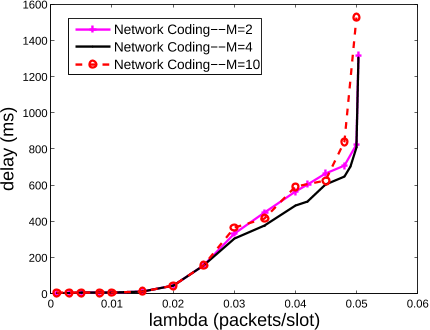

In [ ]:
print(f"<start> {cap2} <end>")
Image.open(myfile)

In [ ]:
train_caption = {}

dir_path = "/content/content/content/scicap_data/SciCap-Caption-All/train/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  myfile = os.path.join(dir_path, filename)
  # checking if it is a file
  if os.path.isfile(myfile):
    with open(myfile, 'r') as f:
      tmp = json.load(f)
    figure_name = tmp['figure-ID']
    caption = re.sub('[.]', '', tmp['1-lowercase-and-token-and-remove-figure-index']['caption'])
    caption = caption.strip()
    caption = f"<start> {caption} <end>"
    train_caption[figure_name] = caption

In [ ]:
with open('/content/content/content/scicap_data/train_caption.json', 'w') as f:
  json.dump(train_caption, f)

In [ ]:
val_caption = {}

dir_path = "/content/content/content/scicap_data/SciCap-Caption-All/val/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  myfile = os.path.join(dir_path, filename)
  # checking if it is a file
  if os.path.isfile(myfile):
    with open(myfile, 'r') as f:
      tmp = json.load(f)
    figure_name = tmp['figure-ID']
    caption = re.sub('[.]', '', tmp['1-lowercase-and-token-and-remove-figure-index']['caption'])
    caption = caption.strip()
    caption = f"<start> {caption} <end>"
    val_caption[figure_name] = caption

In [ ]:
with open('/content/content/content/scicap_data/val_caption.json', 'w') as f:
  json.dump(val_caption, f)

In [ ]:
test_caption = {}

dir_path = "/content/content/content/scicap_data/SciCap-Caption-All/test/"

# iterate over files in
# that directory
for filename in os.listdir(dir_path):
  myfile = os.path.join(dir_path, filename)
  # checking if it is a file
  if os.path.isfile(myfile):
    with open(myfile, 'r') as f:
      tmp = json.load(f)
    figure_name = tmp['figure-ID']
    caption = re.sub('[.]', '', tmp['1-lowercase-and-token-and-remove-figure-index']['caption'])
    caption = caption.strip()
    caption = f"<start> {caption} <end>"
    test_caption[figure_name] = caption

In [ ]:
with open('/content/content/content/scicap_data/test_caption.json', 'w') as f:
  json.dump(test_caption, f)

In [ ]:
test_caption['1005.4984v1-Figure8-1.png']

'<start> packet delay as a function of λ under parn for m > 0 in the wireless network under 2-hop interference model with network coding <end>'

In [ ]:
# Checking the size of root folder after addition of train_caption.json, val_caption.json and test_caption.json
!du -h --max-depth=1 "/content/content/content/scicap_data/"

3.9M	/content/content/content/scicap_data/List-of-Files-for-Each-Experiments
392M	/content/content/content/scicap_data/SciCap-Caption-All
2.4G	/content/content/content/scicap_data/SciCap-No-Subfig-Img
2.8G	/content/content/content/scicap_data/


In [ ]:
# Zip the root folder after addition of train_caption.json, val_caption.json and test_caption.json
!zip -r "compact_scicap_data.zip" "/content/scicap_data"

Streaming output truncated to the last 5000 lines.
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1604.08418v1-Figure2-1.png (deflated 7%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1211.5757v2-Figure12-1.png (deflated 2%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1608.01842v1-Figure6-1.png (deflated 2%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1609.02946v3-Figure2-1.png (deflated 9%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1705.00202v2-Figure3-1.png (deflated 0%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1107.5953v3-Figure6-1.png (deflated 6%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1406.2083v2-Figure4-1.png (deflated 1%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1412.8529v2-Figure3-1.png (deflated 3%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1205.2632v1-Figure2-1.png (deflated 0%)
  adding: content/scicap_data/SciCap-No-Subfig-Img/train/1801.10486v1-F

In [ ]:
# Copying the newly created compact_scicap_data.zip in the Google Drive
!cp "/content/compact_scicap_data.zip" "/content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset bobbig/compact_scicap_data.zip"

In [ ]:
# Deleting the newly created compact_scicap_data.zip file from the Colab local environment
!rm "/content/compact_scicap_data.zip"

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset bobbig/compact_scicap_data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1604.08418v1-Figure2-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1211.5757v2-Figure12-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1608.01842v1-Figure6-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1609.02946v3-Figure2-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1705.00202v2-Figure3-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1107.5953v3-Figure6-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1406.2083v2-Figure4-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1412.8529v2-Figure3-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1205.2632v1-Figure2-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/1801.10486v1-Figure11-1.png  
  inflating: content/scicap_data/SciCap-No-Subfig-Img/train/17

In [ ]:
!mv "/content/content/scicap_data" "."

In [ ]:
!rm -rf "/content/content"

## Curation and Formatting of univ_ai_dataset

**Source: AI-1, AI-2, DS-1 and DS-2 Course Lecture PDFs**

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset bobbig/univ_ai_dataset.zip" -d "."

Archive:  /content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset bobbig/univ_ai_dataset.zip
   creating: ./univ_ai_dataset/captions/
  inflating: ./univ_ai_dataset/captions/captions.json  
  inflating: ./univ_ai_dataset/captions/captions.txt  
   creating: ./univ_ai_dataset/images/
  inflating: ./univ_ai_dataset/images/ekanki-image-1.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-10.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-100.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-11.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-12.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-13.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-14.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-15.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-16.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-17.png  
  inflating: ./univ_ai_dataset/images/ekanki-image-18.png  
  inflating: ./univ_ai_dataset/images/e

In [ ]:
with open("/content/univ_ai_dataset/captions/captions.json", 'r') as f:
  caption = json.load(f)

In [ ]:
caption

{'ekanki-image-1.png': 'decision boundary classifying agricultural and dry land using latitute and longitude.',
 'ekanki-image-10.png': 'line plot showing that accuracy drops as number of noisy features increases in data.',
 'ekanki-image-100.png': 'Plot showing uniform variable istribution and normal residuals.',
 'ekanki-image-11.png': 'loss plot for random forest on train and validation data as number of trees increase.',
 'ekanki-image-12.png': 'ROC curves showing discriminatory power of best classifier compared to perfect and random classifiers.',
 'ekanki-image-13.png': 'scatter plot of data belonging to classes A and B after SMOTE operation.',
 'ekanki-image-14.png': 'scatter plot of data showing x1 and x2 using classes triangle and circle.',
 'ekanki-image-15.png': 'graph exhibiting residuals and tree predictions along with data points.',
 'ekanki-image-16.png': 'graph point to three vectors y1 y2 and y3.',
 'ekanki-image-17.png': 'weight update using gradient descent on a loss

In [ ]:
univ_caption = {}

for img in caption.keys():
  cap = caption[img]
  cap = cap.lower()
  cap = re.sub('[.]', '', cap)
  cap = cap.strip()
  cap = f"<start> {cap} <end>"
  univ_caption[img] = cap

In [ ]:
univ_caption

{'ekanki-image-1.png': '<start> decision boundary classifying agricultural and dry land using latitute and longitude <end>',
 'ekanki-image-10.png': '<start> line plot showing that accuracy drops as number of noisy features increases in data <end>',
 'ekanki-image-100.png': '<start> plot showing uniform variable istribution and normal residuals <end>',
 'ekanki-image-11.png': '<start> loss plot for random forest on train and validation data as number of trees increase <end>',
 'ekanki-image-12.png': '<start> roc curves showing discriminatory power of best classifier compared to perfect and random classifiers <end>',
 'ekanki-image-13.png': '<start> scatter plot of data belonging to classes a and b after smote operation <end>',
 'ekanki-image-14.png': '<start> scatter plot of data showing x1 and x2 using classes triangle and circle <end>',
 'ekanki-image-15.png': '<start> graph exhibiting residuals and tree predictions along with data points <end>',
 'ekanki-image-16.png': '<start> grap

In [ ]:
with open('/content/univ_ai_dataset/univ_caption.json', 'w') as f:
  json.dump(univ_caption, f)

In [ ]:
# Zip the root folder after addition of univ_caption.json
!zip -r "univ_ai_dataset.zip" "/content/univ_ai_dataset"

  adding: content/univ_ai_dataset/ (stored 0%)
  adding: content/univ_ai_dataset/images/ (stored 0%)
  adding: content/univ_ai_dataset/images/ekanki-image-48.png (deflated 2%)
  adding: content/univ_ai_dataset/images/ekanki-image-18.png (deflated 2%)
  adding: content/univ_ai_dataset/images/ekanki-image-42.png (deflated 2%)
  adding: content/univ_ai_dataset/images/ekanki-image-81.png (deflated 2%)
  adding: content/univ_ai_dataset/images/ekanki-image-57.png (deflated 0%)
  adding: content/univ_ai_dataset/images/prerna-image-44.png (deflated 5%)
  adding: content/univ_ai_dataset/images/prerna-image-36.png (deflated 1%)
  adding: content/univ_ai_dataset/images/ekanki-image-88.png (deflated 0%)
  adding: content/univ_ai_dataset/images/ekanki-image-66.png (deflated 1%)
  adding: content/univ_ai_dataset/images/prerna-image-39.png (deflated 3%)
  adding: content/univ_ai_dataset/images/ekanki-image-61.png (deflated 1%)
  adding: content/univ_ai_dataset/images/ekanki-image-35.png (deflated 1%)

In [ ]:
# Copying the newly created univ_ai_dataset.zip in the Google Drive
!cp "/content/univ_ai_dataset.zip" "/content/drive/MyDrive/Colab Notebooks/AI-3/Project/AI-3 Project Dataset bobbig/univ_ai_dataset.zip"

In [ ]:
# Deleting the newly created univ_ai_dataset.zip file from the Colab local environment
!rm "/content/univ_ai_dataset.zip"

In [ ]:
# with open("/content/univ_ai_dataset/univ_caption.json", 'r') as f:
#   univ_caption = json.load(f)

In [ ]:
img_dir = "/content/univ_ai_dataset/images/"
img_path = []
cap = []
for img_name in list(univ_caption.keys())[:5]:
  img_path.append(img_dir+img_name)
  cap.append(univ_caption[img_name])

<start> decision boundary classifying agricultural and dry land using latitute and longitude <end>


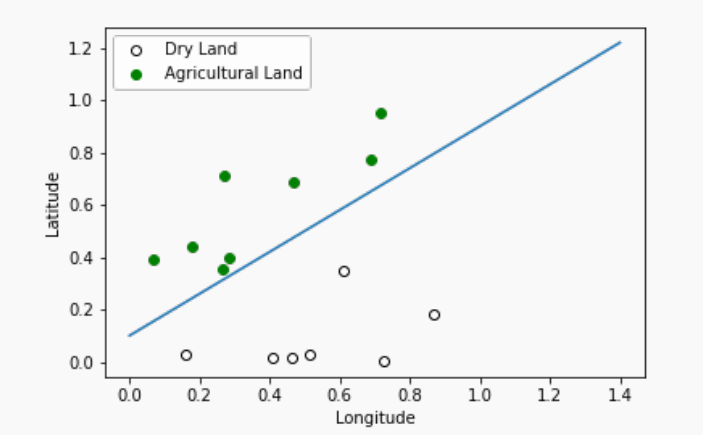

In [ ]:
print(cap[0])
Image.open(img_path[0])

<start> axis aligned hyperplanes partitioning fruits based on height and width features <end>


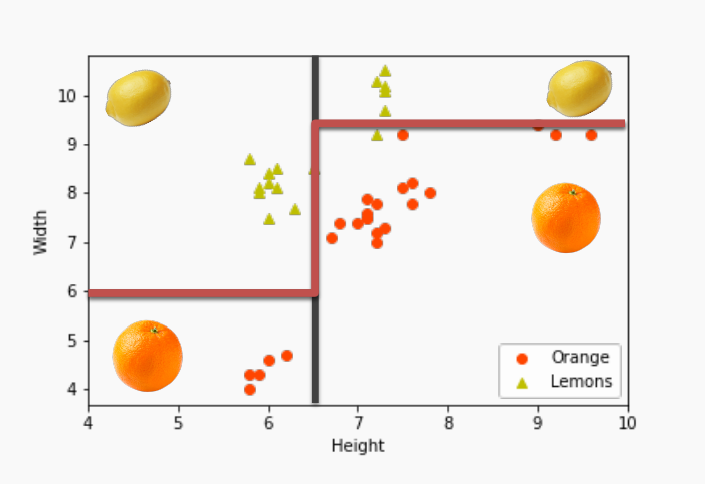

In [ ]:
print(cap[1])
Image.open(img_path[1])

<start> comparing different impurity metrics like gini impurity entropy for 2 class classification <end>


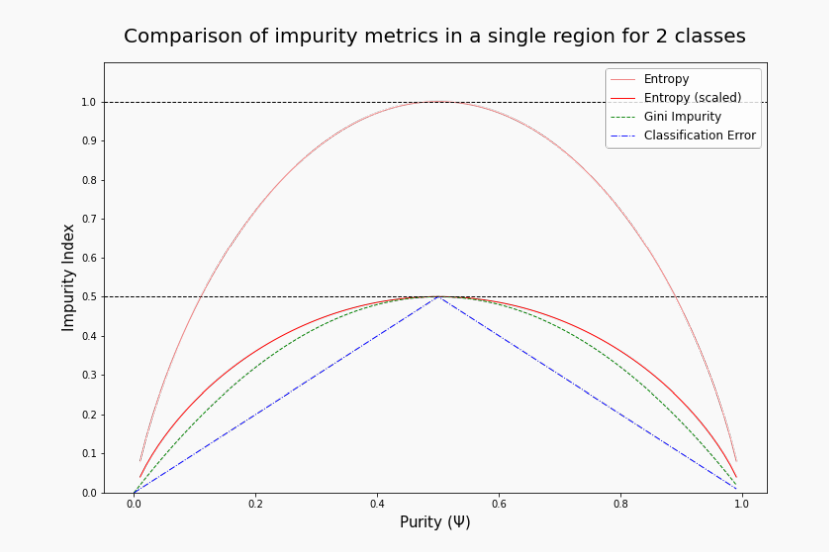

In [ ]:
print(cap[2])
Image.open(img_path[2])

<start> comparing predicted y using regression tree with actual y <end>


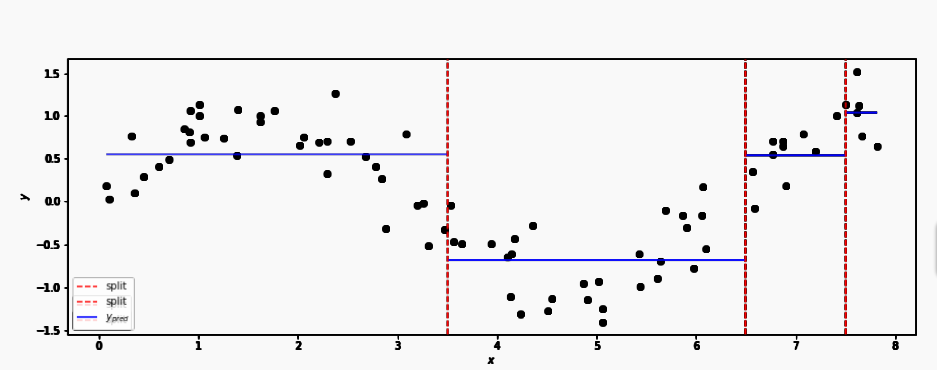

In [ ]:
print(cap[3])
Image.open(img_path[3])

<start> analysis of bias variance trade off by comparing training and test error with increasing model complexity <end>


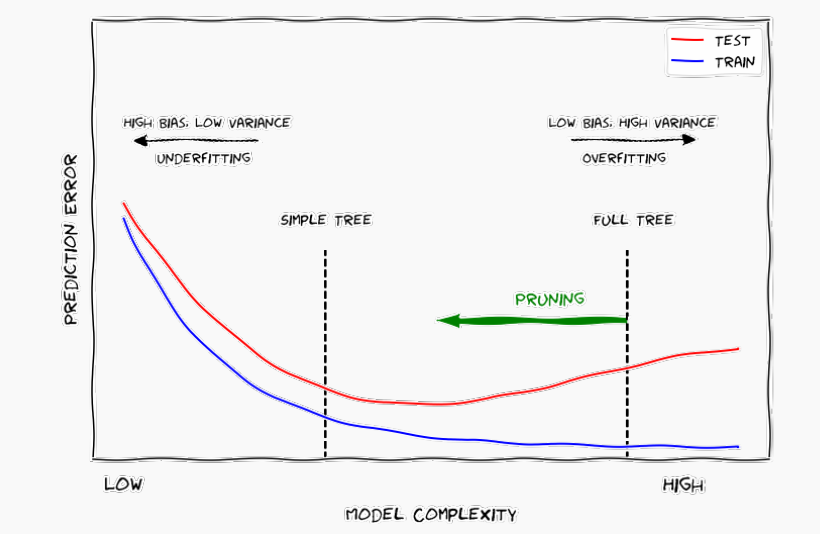

In [ ]:
print(cap[4])
Image.open(img_path[4])